In [21]:
import keras
from PIL import Image
import glob
import pandas as pd
import numpy as np

model = keras.models.load_model('../Models/csgid-image-rec.h5')
minstrel_dir = "../Minstrel-Screens/*/*"

def image_preprocess(impath):
    image = Image.open(impath)
    crop_size = min(image.size)
    left = (image.size[1]-crop_size)//2
    right = image.size[1]-(image.size[1]-crop_size)//2
    bottom = (image.size[0]-crop_size)//2
    top = image.size[0]//2+crop_size//2
    image = image.crop((left, bottom, right, top))
    image = image.resize((512,512),Image.ANTIALIAS)
    image = np.asarray(image)
    return image

def image_getter(plate_dir):
    image_folders = glob.glob(plate_dir)
    wells = pd.DataFrame(glob.glob(image_folders[1]+"/*"), columns = ["filepath"])
    wells = wells[wells["filepath"].str.contains("_E0_")]
    wells = wells.reset_index().drop(columns = "index")
    wells["image"] = wells['filepath'].apply(lambda x: image_preprocess(x))
    return wells

def predict(image, classifier):
    #for each image, load, resize and predict. (morphological?)
    prediction = classifier.predict(image)
    return prediction

In [22]:
wells = image_getter(minstrel_dir)

In [23]:
test_image = wells.iloc[0]['image']

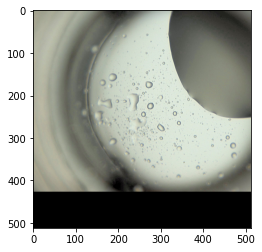

In [24]:
import matplotlib.pyplot as plt
plt.imshow(test_image)

In [27]:
model.predict(test_image)

ValueError: in user code:

    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/grant/anaconda3/envs/Crystal_Image_Rec/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [32, 512, 3]


In [26]:
test_image.shape

(512, 512, 3)